<a href="https://colab.research.google.com/github/portkey2112/machine_learning/blob/master/mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import tensorflow as tf
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
#from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras

In [6]:
tf.__version__

'2.3.0'

In [7]:
X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y = True)

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [10]:
y = y.reshape(70000, 1)

In [11]:
y.shape

(70000, 1)

In [12]:
X /= 255.

'5'

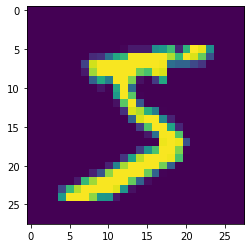

In [13]:
plt.imshow(X[0].reshape(28, 28))
y[0][0]

In [14]:
y = y.astype(np.int32)

In [15]:
y[0][0]

5

In [42]:
def one_hot_encode(X, Y, num_classes):
  m = X.shape[0]
  one_hot_Y = np.zeros((m, num_classes))
  one_hot_Y[np.arange(0, m), Y] = 1
  return one_hot_Y

In [43]:
y

array([[5],
       [0],
       [4],
       ...,
       [4],
       [5],
       [6]], dtype=int32)

In [44]:
one_hot_Y = one_hot_encode(X, y.reshape(y.shape[0],), num_classes=10)

In [47]:
one_hot_Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
one_hot_Y.shape

(70000, 10)

In [60]:
Y = one_hot_Y

X_train = X[0:56000, :]
Y_train = Y[0:56000, :]

#X_dev = X[42000:56000, :]
#Y_dev = Y[42000:56000, :]

X_test = X[56000:, :]
Y_test = Y[56000:, :]

In [61]:
print("X_train.shape = ", X_train.shape)
print("Y_train.shape = ", Y_train.shape)

X_train.shape =  (56000, 784)
Y_train.shape =  (56000, 10)


In [128]:
model = keras.Sequential([
                          keras.Input(shape=(X_train.shape[1],)),
                          keras.layers.Dense(784, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.fit(x=X_train, y=Y_train, batch_size=1, epochs=1, validation_split=0.2) #20% of training set as cross-validation set.

44800/44800 [==============================] - 131s 3ms/step - loss: 0.2516 - accuracy: 0.9304 - val_loss: 0.2235 - val_accuracy: 0.9488


In [129]:
def get_test_accu(X_test, Y_test):
  Y_pred = model.predict(X_test)
  maxx = np.max(Y_pred, axis=1)
  maxx = maxx.reshape(maxx.shape[0], 1)
  one_hot_pred = np.where(Y_pred==maxx, 1, 0)
  #actual predictions for referance if required
  pred = np.array([np.where(r == 1)[0][0] for r in one_hot_pred])
  Y = np.array([np.where(r == 1)[0][0] for r in Y_test])

  print(pred.shape)
  print(Y.shape)

  #find accuracy
  accu = (np.sum(pred == Y)/Y_test.shape[0]) * 100
  return accu

In [130]:
test_accu = get_test_accu(X_test, Y_test)

(14000,)
(14000,)


In [131]:
test_accu

95.87142857142858

In [122]:
Y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [126]:
for r in Y_test:
  x=np.where(r == 1)
  print(x) #tuple
  print(x[0])
  print(x[0][0])
  break

(array([1]),)
[1]
1


In [125]:
#We need the label. Hence, np.where(r==1)[0][0]

Accuracies: train - 93%; Validation accuracy - 94%; Test accuracy - 95% 